# Auto MPG Data Cleaning and Visualization

In any machine learning project, the first step is to investigate the dataset inorder to understand which algorithms could be applied for prediction. This notebook covers the data cleaning and visualization aspects (basically make the data ready to apply any ML - algorithm)

The dataset used in this notebook is taken from UCI Machine Learning repository. 
Dataset: https://archive.ics.uci.edu/ml/datasets/Auto%2BMPG

In [1]:
# Basic Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data Cleaning and Formatting

This step involves complete investigation of dataset.

In [2]:
auto_mpg = pd.read_csv('data/auto-mpg.data-original', names = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin", "car_name"], delim_whitespace = True)

In [3]:
auto_mpg.shape

(406, 9)

In [4]:
#display the first five rows

auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [5]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


The given dataset must contain 406 records in each column but columns 'mpg' and 'horsepower' has some missing values.

In [6]:
# Statistical analysis

auto_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Data Cleaning and Visualization

##### Case 1: 
Since the dataset contains car manufacturer followed by car name in the 'car_name' column, lets separate them out

In [7]:
model = []
for x in auto_mpg["car_name"]:
    x = x.split()
    model.append(x[0])
    
auto_mpg['manufacturer'] = model

auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,manufacturer
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,chevrolet
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,buick
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,plymouth
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,amc
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,ford


Text(0.5, 1.0, 'Density Plot of mpg by top 5 manufacturers')

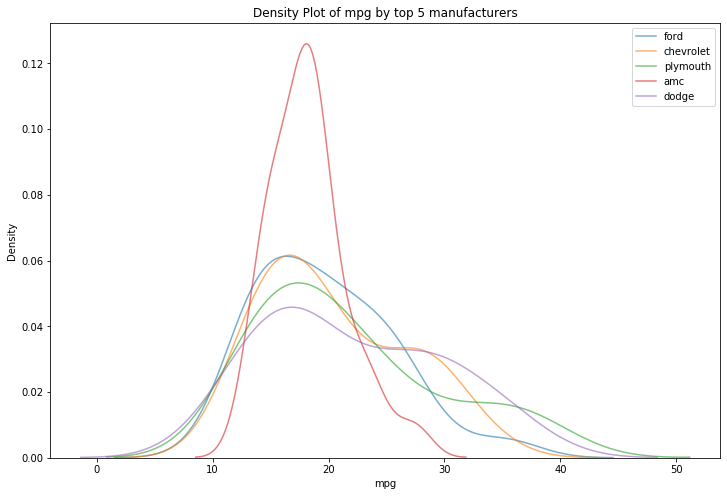

In [8]:
# Density Plot of mpg by top 5 manufacturer

brands = auto_mpg.dropna(subset = ['mpg'])
brands = auto_mpg['manufacturer'].value_counts()[:5]
brands = list(brands.index)

plt.figure(figsize = (12,8))
for i in brands:
    subset = auto_mpg[auto_mpg['manufacturer'] == i]
    sns.kdeplot(subset['mpg'].dropna(), label = i, alpha = 0.6)
    

plt.xlabel('mpg')
plt.ylabel('Density') 
plt.title('Density Plot of mpg by top 5 manufacturers')

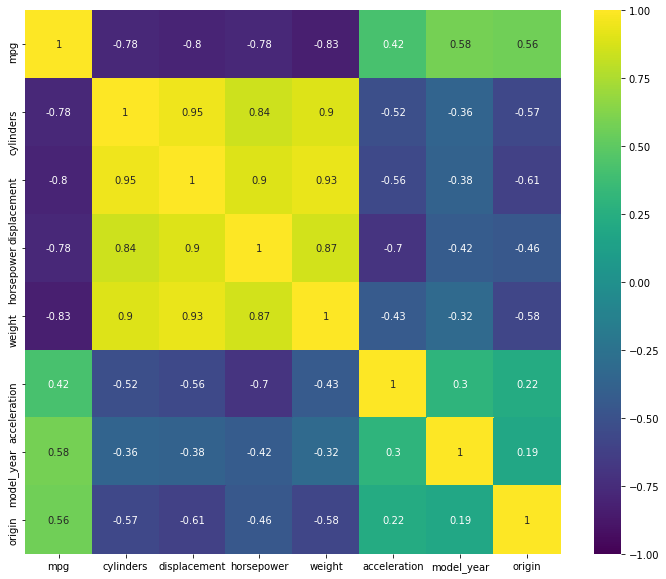

In [9]:
# Heatmap provides the corelation between each and every columns of the dataset
plt.figure(figsize = (12,10))
corr_data = auto_mpg.corr()
sns.heatmap(corr_data, vmin = -1, vmax = 1, cmap = 'viridis', annot = True)

##### Case 2:

This dataset has some missing values. Instead of deleting such entries before carring any operation, let's use imputation to replace the missing values.  
Intution: Replace NaN with median of that column

In [10]:
naive_mpg = auto_mpg['mpg'].median()
naive_horsepower = auto_mpg['horsepower'].median()

In [12]:
auto_mpg.fillna(value = {'mpg': naive_mpg, 'horsepower': naive_horsepower}, inplace = True)

In [13]:
auto_mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
manufacturer    0
dtype: int64

Alternative:  Use sklearn's imputer to replace the missing values in each column  
Here X = features and y = target ['mpg']  
  
from sklearn.impute import SimpleImputer  
imputer = SimpleImputer(strategy = "median")  
X = imputer.fit_transform(X)  
y = imputer.fit_transform(y)  

##### Data is now ready!

Things to note before applying any ML algorithm:
    1. Perform feature scaling
    2. Use the 60:20:20 rule to split the data into training, crossvalidation and testing sets
    3. Incase of Underfitting, use categorical columns ('manufacturer' in this case) and perform one-hot encoding to increase the feature size.
    4. Incase of Overfitting, control lambda.
    